<a href="https://colab.research.google.com/github/omkar5214/ML-EXP3-Decision-Trees/blob/main/ML_exp3_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(iris_url, names=iris_cols)

X_iris = iris_data.drop(columns='species')
y_iris = iris_data['species']
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

In [17]:

boston_data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

X_boston = boston_data.drop(columns='medv')
y_boston = boston_data['medv']
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.3, random_state=42)


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



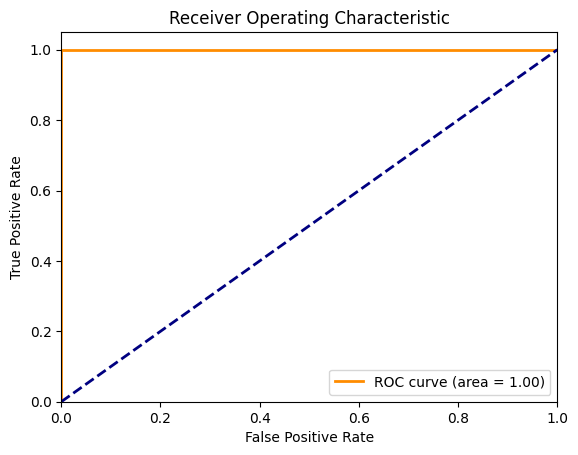

In [18]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train_iris, y_train_iris)
y_pred_iris = clf.predict(X_test_iris)

conf_matrix = confusion_matrix(y_test_iris, y_pred_iris)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test_iris, y_pred_iris))

y_prob_iris = clf.predict_proba(X_test_iris)
fpr, tpr, _ = roc_curve(pd.get_dummies(y_test_iris).values.ravel(), y_prob_iris.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Mean Squared Error: 19.33342105263158


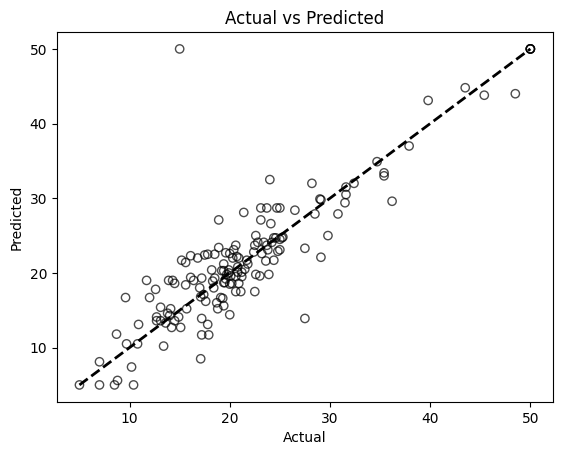

In [19]:
regr = DecisionTreeRegressor(criterion='squared_error')
regr.fit(X_train_boston, y_train_boston)
y_pred_boston = regr.predict(X_test_boston)

mse = mean_squared_error(y_test_boston, y_pred_boston)
print("Mean Squared Error:", mse)

plt.figure()
plt.scatter(y_test_boston, y_pred_boston, edgecolor='k', facecolor='none', alpha=0.7, linewidth=1)
plt.plot([y_test_boston.min(), y_test_boston.max()], [y_test_boston.min(), y_test_boston.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()